In [3]:
using AbstractPlotting, CairoMakie, AbstractPlotting.MakieLayout
using NCDatasets
using Base64
using Printf
using AvailablePotentialEnergyFramework
using JLD

In [17]:
data_dir = "$(ENV["SCRATCH"])/for_postprocessing/largencfiles/"
output_dir = "/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"


"/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/"

In [5]:
file_radiation = joinpath(ENV["SCRATCH"],"for_postprocessing/largencfiles/f5e-4_2km_1000km_homoRad_homoSfc_RRTM_2d.nc")
file_microphysics = joinpath(ENV["SCRATCH"],"for_postprocessing/largencfiles/f5e-4_2km_1000km_homoRad_homoSfc_MICRO_THOM_2d.nc")
file_305K = joinpath(ENV["SCRATCH"],"for_postprocessing/largencfiles/f5e-4_2km_1000km_homoRad_homoSfc_303K_2d.nc")
file_297K = joinpath(ENV["SCRATCH"],"for_postprocessing/largencfiles/f5e-4_2km_1000km_homoRad_homoSfc_297K_2d.nc");
file_f1 = joinpath(ENV["SCRATCH"],"for_postprocessing/largencfiles/f1e-4_2km_1000km_homoRad_homoSfc_2d.nc");
file_f3 = joinpath(ENV["SCRATCH"],"for_postprocessing/largencfiles/f3e-4_2km_1000km_homoRad_homoSfc_2d.nc");

In [6]:
function read_data(filename,times)
    Dataset(filename) do ds
        psfc =variable(ds,"PSFC")[:,:,times] :: Array{Float32,3}
        u = variable(ds,"USFC")[:,:,times] :: Array{Float32,3}
        v = variable(ds,"VSFC")[:,:,times] :: Array{Float32,3}
        time = variable(ds,"time")[times] :: Array{Float32,1}
        sp = hypot.(u,v)
        #psfc = permutedims(psfc,(2,1,3))
        #sp = permutedims(sp,(2,1,3))
        psfc, sp, time
    end
end

read_data (generic function with 1 method)

In [23]:
time_slab = 1:2:1200
psfc_radiation,sp_radiation,times = read_data(file_radiation,time_slab)
psfc_microphysics,sp_microphysics,times = read_data(file_microphysics,time_slab)
psfc_305K,sp_305K,times = read_data(file_305K,time_slab)
psfc_297K,sp_297K,times = read_data(file_297K,time_slab);
psfc_f3,sp_f3,times = read_data(file_f3,time_slab)
psfc_f1,sp_f1,times = read_data(file_f1,time_slab);

In [24]:
time_idx = Node(1)
psfc_1 = @lift(psfc_microphysics[:,:,$time_idx])
sp_1 = @lift(sp_microphysics[:,:,$time_idx])

psfc_2 = @lift(psfc_radiation[:,:,$time_idx])
sp_2 = @lift(sp_radiation[:,:,$time_idx])

psfc_3 = @lift(psfc_305K[:,:,$time_idx])
sp_3 = @lift(sp_305K[:,:,$time_idx])

psfc_4 = @lift(psfc_297K[:,:,$time_idx])
sp_4 = @lift(sp_297K[:,:,$time_idx]);

psfc_5 = @lift(psfc_f1[:,:,$time_idx])
sp_5 = @lift(sp_f1[:,:,$time_idx])

psfc_6 = @lift(psfc_f3[:,:,$time_idx])
sp_6 = @lift(sp_f3[:,:,$time_idx]);

time_string = @lift(@sprintf "Wind speed at the surface at day %5.1f" times[$time_idx])

Observable{String} with 0 listeners. Value:
"Wind speed at the surface at day   0.0"

In [ ]:
sp_1 == sp_3

In [25]:
timeindices = 1:length(times)

1:600

In [26]:
x = y = range(0,stop=1024,length=512)

0.0:2.003913894324853:1024.0

In [27]:
time_idx[] = 1

1

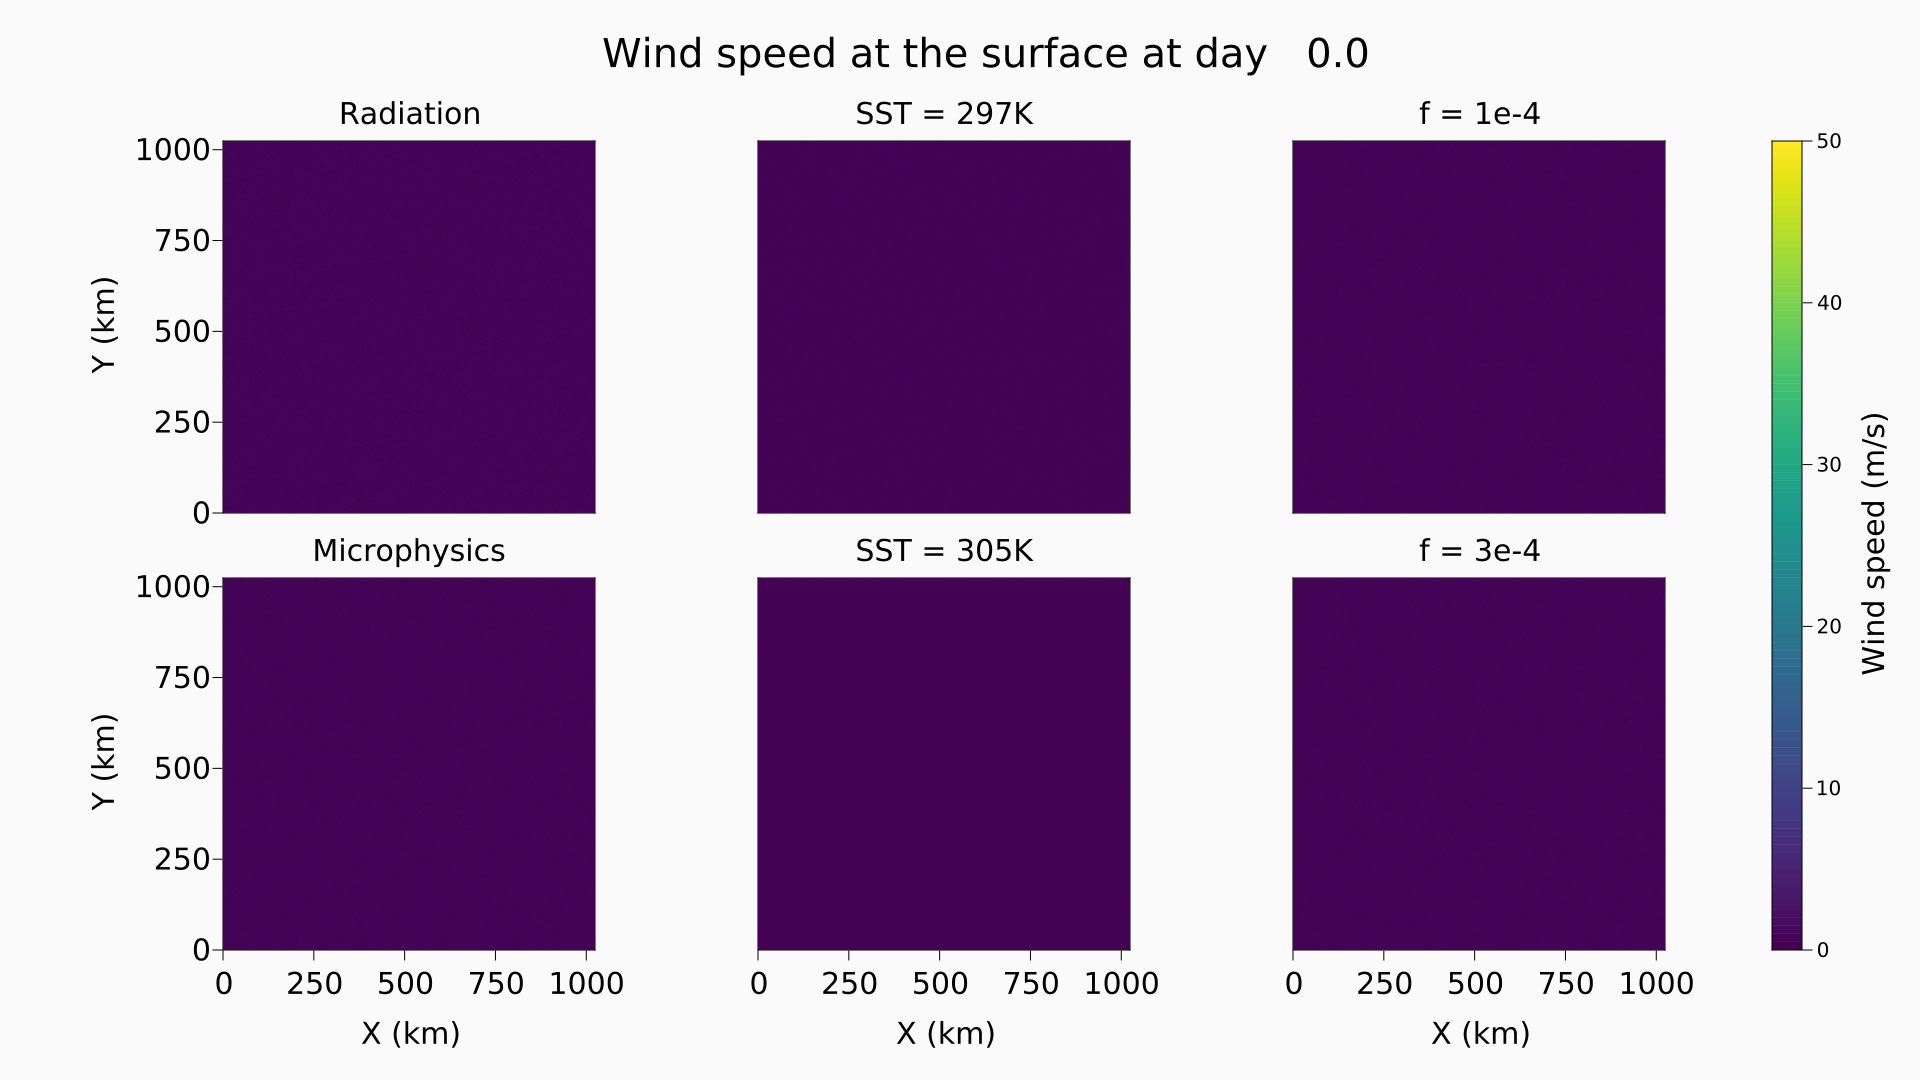

In [28]:
set_theme!(colgap=50,font=" DejaVu Sans")
#outer_padding = 30
#scene, layout = layoutscene(outer_padding, resolution = (1200, 700),backgroundcolor =RGBf0(0.98, 0.98, 0.98))
scene, layout = layoutscene(resolution = (1920,1080 ),backgroundcolor =RGBf0(0.98, 0.98, 0.98))
ax11 = layout[1, 1] = LAxis(scene, title = "Radiation", titlesize=30)
psfc11 = contour!(ax11,x,y, sp_2, fillrange=true,colorrange = (0,50))
ax12 = layout[1, 2] = LAxis(scene, title = "SST = 297K", titlesize=30)
psfc12 = contour!(ax12,x,y, sp_4,fillrange=true,colorrange = (0, 50))
ax13 = layout[1, 3] = LAxis(scene, title = "f = 1e-4", titlesize=30)
psfc13 = contour!(ax13,x,y, sp_5,fillrange=true,colorrange = (0,50))

### Lower row
ax21 = layout[2, 1] = LAxis(scene, title = "Microphysics", titlesize=30)
line21 = contour!(ax21,x,y, sp_1,fillrange=true,colorrange = (0,50))
ax22 = layout[2, 2] = LAxis(scene, title = "SST = 305K", titlesize=30)
line22 = contour!(ax22,x,y, sp_3,fillrange=true,colorrange = (0,50))
ax23 = layout[2, 3] = LAxis(scene, title = "f = 3e-4", titlesize=30)
line23 = contour!(ax23,x,y, sp_6,fillrange=true,colorrange = (0,50))
#ax24 = layout[2, 4] = LAxis(scene)
#line24 = contour!(ax24,x,y, sp_4,fillrange=true,colorrange = (0,50))
cbar = layout[:,4] = LColorbar(scene, line21, label = "Wind speed (m/s)",labelsize = 30)
cbar.width=30
#cbar = layout[2,4] = LColorbar(scene, line21, label = "Wind speed (m/s)",labelsize = 30)
#cbar.width=30

ax11.aspect = AxisAspect(1)
ax12.aspect = AxisAspect(1)
ax13.aspect = AxisAspect(1)
#ax14.aspect = AxisAspect(1)
ax21.aspect = AxisAspect(1)
ax22.aspect = AxisAspect(1)
ax23.aspect = AxisAspect(1)
#ax24.aspect = AxisAspect(1)

ax11.ylabel = "Y (km)"
ax21.ylabel = "Y (km)"

ax21.xlabel = "X (km)"
ax22.xlabel = "X (km)"
ax23.xlabel = "X (km)"
#ax24.xlabel = "X (km)"

ax11.ylabelsize = 30
ax21.ylabelsize = 30

ax21.xlabelsize = 30
ax22.xlabelsize = 30
ax23.xlabelsize = 30


ax11.yticklabelsize = 30
ax21.yticklabelsize = 30

ax21.xticklabelsize = 30
ax22.xticklabelsize = 30
ax23.xticklabelsize = 30


linkaxes!(ax11, ax12,ax13,ax21,ax22,ax23)

tightlimits!.((ax11,ax12,ax13,ax21,ax22,ax23))

hideydecorations!(ax12, grid = false)
hideydecorations!(ax13, grid = false)
hideydecorations!(ax22, grid = false)
hideydecorations!(ax23, grid = false)

hidexdecorations!(ax11, grid = false)
hidexdecorations!(ax12, grid = false)
hidexdecorations!(ax13, grid = false)


supertitle = layout[0, :] = LText(scene, time_string,
    textsize = 40)
scene

In [29]:
record(scene, joinpath(output_dir,"time_animation_sensitivity.mp4"), timeindices; framerate = 10, compression = 0) do t
    time_idx[] = t 
end

"/global/u2/a/aramreye/RamirezReyes_Yang_2020_SpontaneousCyclogenesis/plotsandanimations/time_animation_sensitivity.mp4"

In [22]:
save(joinpath(output_dir,"snapshot_sensitivity.eps"),scene)
save(joinpath(output_dir,"snapshot_sensitivity.pdf"),scene)
save(joinpath(output_dir,"snapshot_sensitivity.png"),scene)

CairoScreen{Cairo.CairoSurfaceBase{UInt32}} with surface:
Cairo.CairoSurfaceBase{UInt32}(Ptr{Nothing} @0x00000000146e1040, 1920.0, 1080.0)
